In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
import json, codecs, uuid

In [23]:
uvvis = pd.read_excel("./uvvis.xlsx", engine='openpyxl')
comps = pd.read_csv("../../misc/saxs_052125.csv").drop("index", axis=1)

In [24]:
factor = 1300/300
bounds = factor * np.asarray([(0.0, 35.0), (0.0, 35.0)]).T

In [25]:
def _inset_spectra(c, t, ft, ax, **kwargs):
    loc_ax = ax.transLimits.transform(c)
    ins_ax = ax.inset_axes([loc_ax[0]-0.05,loc_ax[1]-0.05,0.1,0.1])
    ins_ax.scatter(t, 
                ft, 
                color = kwargs.get("color", "tab:blue"),
                alpha = kwargs.get("alpha", 1.0),
                s = kwargs.get("s", 1.0)
                )
    limits = kwargs.get("limits", None)
    if limits is not None:
        ins_ax.set_ylim(*limits)
    ins_ax.axis('off')
    
    return ins_ax

class MinMaxScaler:
    def __init__(self, min, max):
        self.min = min 
        self.max = max 
        self.range = max-min

    def transform(self, x):
        return (x-self.min)/self.range
    
    def inverse(self, xt):
        return (self.range*xt)+self.min

def scaled_tickformat(scaler, x, pos):
    return '%.2f'%scaler.inverse(x) 

In [26]:
wl = uvvis["Wavelength"].to_numpy()
water = uvvis["Water"].to_numpy()

/var/folders/84/z8kd1tl11hl96fsszww81rx40000gp/T/ipykernel_5049/1009166627.py:36: UserWarning: No SAXS data available for well A4 with composition: [0.00, 76.00]
  warnings.warn("No SAXS data available for well %s with composition: [%.2f, %.2f]"%(well_name, ci[0], ci[1]))
/var/folders/84/z8kd1tl11hl96fsszww81rx40000gp/T/ipykernel_5049/1009166627.py:36: UserWarning: No SAXS data available for well D2 with composition: [112.00, 146.00]
  warnings.warn("No SAXS data available for well %s with composition: [%.2f, %.2f]"%(well_name, ci[0], ci[1]))
/var/folders/84/z8kd1tl11hl96fsszww81rx40000gp/T/ipykernel_5049/1009166627.py:36: UserWarning: No SAXS data available for well D3 with composition: [135.00, 110.00]
  warnings.warn("No SAXS data available for well %s with composition: [%.2f, %.2f]"%(well_name, ci[0], ci[1]))


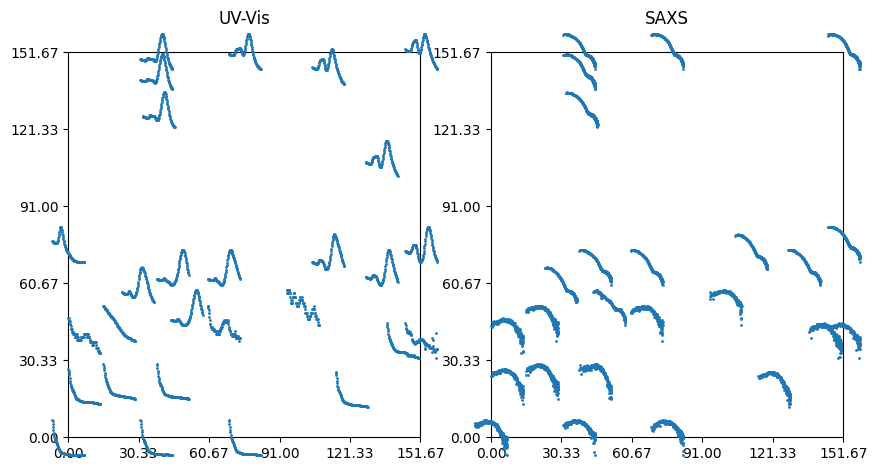

In [27]:
fig, axs = plt.subplots(1,2, figsize=(5*2,5))
for i, well_name in enumerate(uvvis.columns[1:-1]):
    data = {"metadata" : 
                {"authors" : ["Kiran Vaddi", "Aleks Grey"],
                "date" : "05-21-2025",
            "synthesis" : "seed-mediated-aunp"
        }
    }
    ci = comps.iloc[i][["SN", "AA"]].to_numpy()
    data["composition"] = comps.iloc[i].to_dict()

    scaler_x = MinMaxScaler(bounds[0,0], bounds[1,0])
    scaler_y = MinMaxScaler(bounds[0,1], bounds[1,1])
    norm_ci = np.array([scaler_x.transform(ci[0]), scaler_y.transform(ci[1])])
    
    y = uvvis.iloc[:, i+1] - water
    data["uvvis"] = {"wl" : wl.tolist(), 
                     "ext": y.tolist(), 
                     "metadata" : {"date" : "05-24-2025", "instrument" : "biotek"}
                }
    ins_ax = _inset_spectra(norm_ci, wl, y, axs[0], s=1)
    axs[0].set_title("UV-Vis")

    try:
        saxs = np.load("./Merged_Data/%s.npz"%(well_name))
        data["saxs"] = {"q" : saxs["q"].tolist(), 
                        "Iq": saxs["Iq"].tolist(),
                        "metadata" : {"date" : "05-21-2025", "instrument" : "xenocs"}
                    }
        ins_ax = _inset_spectra(norm_ci, saxs["q"], saxs["Iq"], axs[1], s=1)
        ins_ax.set_xscale("log")
        ins_ax.set_yscale("log")
        axs[1].set_title("SAXS")
    except:
        data["saxs"] = {}
        warnings.warn("No SAXS data available for well %s with composition: [%.2f, %.2f]"%(well_name, ci[0], ci[1]))
    
    unique_id = "05212025_%s"%well_name
    json.dump(data, codecs.open("../uvvis_saxs_aunp/%s.json"%unique_id, 'w', encoding='utf-8'), 
            separators=(',', ':'), 
            sort_keys=True, 
            indent=4
        )

for ax in axs:       
    ax.xaxis.set_major_formatter(lambda x, pos : scaled_tickformat(scaler_x, x, pos))
    ax.yaxis.set_major_formatter(lambda y, pos : scaled_tickformat(scaler_y, y, pos))
plt.show()

In [28]:
import glob
files = glob.glob("../uvvis_saxs_aunp/*.json")
obj_text = codecs.open(files[0], 'r', encoding='utf-8').read()
json.loads(obj_text)

{'composition': {'AA': 56,
  'CTAB': 416,
  'GCH': 256,
  'GS': 104,
  'SN': 3,
  'Water': 465},
 'metadata': {'authors': ['Kiran Vaddi', 'Aleks Grey'],
  'date': '05-08-2025',
  'synthesis': 'seed-mediated-aunp'},
 'saxs': {'Iq': [0.640812815,
   0.852447664,
   1.04846287,
   0.40802183,
   0.524554523,
   0.816740297,
   1.08672268,
   0.694828655,
   0.681451198,
   0.595538377,
   0.543883298,
   0.60817041,
   0.490653645,
   0.589697917,
   0.552354957,
   0.542816416,
   0.515935815,
   0.472382045,
   0.459771469,
   0.472115758,
   0.464446443,
   0.437851537,
   0.459560024,
   0.40356183,
   0.344962126,
   0.360246185,
   0.372746069,
   0.390419402,
   0.383820021,
   0.354655481,
   0.352118227,
   0.32097875,
   0.299679755,
   0.29183960000000003,
   0.21729907900000003,
   0.2628238500000001,
   0.24909788999999996,
   0.229936582,
   0.24399711700000004,
   0.22531323899999997,
   0.183125673,
   0.217402106,
   0.203744314,
   0.20406177399999997,
   0.189296564,
  

In [29]:
files[0]

'../uvvis_saxs_aunp/05082025_18.json'